In [2]:
import numpy as np
import pandas as pd
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.cross_validation import train_test_split
from dbanalysis import stop_tools
from dbanalysis import headers as hd
import time
from sklearn.metrics import mean_absolute_error
import xgboost
from xgboost import XGBRegressor
from sklearn import metrics
#from sklearn.utils import check_arrays

pd.set_option('display.max_columns', 500)

/home/student/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    MAPE=np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    del(y_true)
    del(y_pred)
    return MAPE

In [31]:
def neural_networks(df, df_traveltime):
    errors=[]
    x_train, x_test, y_train, y_test=train_test_split(df, df_traveltime, test_size=0.2, random_state=4)
    nn=MLPRegressor(activation='relu',solver='adam',hidden_layer_sizes=(100, 60,20),random_state=1, max_iter=1000).fit(x_train,y_train.values.ravel())
    #nn.fit(x_train,y_train.values.ravel())
    pred=nn.predict(x_test)
    errors.append(mean_absolute_error(y_test, pred))
    errors.append(mean_absolute_percentage_error(y_test, pred))
    errors.append(metrics.r2_score(y_test, pred))
    #with open('/data/ANN.pickle', 'wb') as handle:
        #pickle.dump(nn, handle,protocol=pickle.HIGHEST_PROTOCOL)
    del(df)
    del(df_traveltime)
    return errors, pred
    

In [57]:
def xgb(df, df_traveltime):
    errors=[]
    x_train, x_test, y_train, y_test=train_test_split(df, df_traveltime, test_size=0.2, random_state=4)
    xgb=XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7).fit(x_train,y_train.values.ravel())
    #xgb.fit(x_train,y_train.values.ravel())
    pred=xgb.predict(x_test)
    errors.append(mean_absolute_error(y_test, pred))
    errors.append(mean_absolute_percentage_error(y_test, pred))
    errors.append(metrics.r2_score(y_test, pred))
    #with open('/data/xgb.pickle', 'wb') as handle:
        #pickle.dump(xgb, handle,protocol=pickle.HIGHEST_PROTOCOL)
    del(df)
    del(df_traveltime)
    return errors, pred

In [6]:
df_cluster= pd.read_csv('/data/cluser1.csv')

In [7]:
df_cluster.head()

,index,dayofservice,tripid,plannedtime_arr_from,plannedtime_dep_from,actualtime_arr_from,actualtime_dep_from,plannedtime_arr_to,actualtime_arr_to,routeid,fromstop,tostop,traveltime,dwelltime,distance,speed,dt,date,day,month,hour,year,dewpt,msl,rain,rhum,temp,vappr,wetb
0,40,03-JAN-17 00:00:00,4089854,26003,26003,25729,25729,26023,25746,31_16,553,554,17,0,0.309288,65.496177,2017-01-03,2017-01-03,1,1,7,2017,0.5,1031.2,0.0,92,1.6,6.3,1.2
1,6693,03-JAN-17 00:00:00,4089907,27433,27433,27159,27172,27474,27200,31_15,553,554,28,13,0.309288,39.765536,2017-01-03,2017-01-03,1,1,7,2017,0.5,1031.2,0.0,92,1.6,6.3,1.2
2,16790,03-JAN-17 00:00:00,4089941,29098,29098,28591,28591,29120,28610,31_15,553,554,19,0,0.309288,58.601843,2017-01-03,2017-01-03,1,1,7,2017,0.5,1031.2,0.0,92,1.6,6.3,1.2
3,83,04-JAN-17 00:00:00,4089854,26003,26003,25890,25890,26023,25909,31_16,553,554,19,0,0.309288,58.601843,2017-01-04,2017-01-04,2,1,7,2017,4.0,1028.9,0.0,94,4.8,8.1,4.4
4,6745,04-JAN-17 00:00:00,4089907,27433,27433,27235,27245,27474,27270,31_15,553,554,25,10,0.309288,44.537401,2017-01-04,2017-01-04,2,1,7,2017,4.0,1028.9,0.0,94,4.8,8.1,4.4


In [8]:
df_cluster.shape

(228097, 29)

In [9]:
df_cluster.head(10)

,index,dayofservice,tripid,plannedtime_arr_from,plannedtime_dep_from,actualtime_arr_from,actualtime_dep_from,plannedtime_arr_to,actualtime_arr_to,routeid,fromstop,tostop,traveltime,dwelltime,distance,speed,dt,date,day,month,hour,year,dewpt,msl,rain,rhum,temp,vappr,wetb
0,40,03-JAN-17 00:00:00,4089854,26003,26003,25729,25729,26023,25746,31_16,553,554,17,0,0.309288,65.496177,2017-01-03,2017-01-03,1,1,7,2017,0.5,1031.2,0.0,92,1.6,6.3,1.2
1,6693,03-JAN-17 00:00:00,4089907,27433,27433,27159,27172,27474,27200,31_15,553,554,28,13,0.309288,39.765536,2017-01-03,2017-01-03,1,1,7,2017,0.5,1031.2,0.0,92,1.6,6.3,1.2
2,16790,03-JAN-17 00:00:00,4089941,29098,29098,28591,28591,29120,28610,31_15,553,554,19,0,0.309288,58.601843,2017-01-03,2017-01-03,1,1,7,2017,0.5,1031.2,0.0,92,1.6,6.3,1.2
3,83,04-JAN-17 00:00:00,4089854,26003,26003,25890,25890,26023,25909,31_16,553,554,19,0,0.309288,58.601843,2017-01-04,2017-01-04,2,1,7,2017,4.0,1028.9,0.0,94,4.8,8.1,4.4
4,6745,04-JAN-17 00:00:00,4089907,27433,27433,27235,27245,27474,27270,31_15,553,554,25,10,0.309288,44.537401,2017-01-04,2017-01-04,2,1,7,2017,4.0,1028.9,0.0,94,4.8,8.1,4.4
5,16842,04-JAN-17 00:00:00,4089941,29098,29098,28575,28575,29120,28593,31_15,553,554,18,0,0.309288,61.857501,2017-01-04,2017-01-04,2,1,7,2017,4.0,1028.9,0.0,94,4.8,8.1,4.4
6,126,05-JAN-17 00:00:00,4089854,26003,26003,25863,25863,26023,25880,31_16,553,554,17,0,0.309288,65.496177,2017-01-05,2017-01-05,3,1,7,2017,-1.4,1031.7,0.0,95,-0.8,5.5,-1.0
7,6797,05-JAN-17 00:00:00,4089907,27433,27433,27428,27438,27474,27463,31_15,553,554,25,10,0.309288,44.537401,2017-01-05,2017-01-05,3,1,7,2017,-1.4,1031.7,0.0,95,-0.8,5.5,-1.0
8,16894,05-JAN-17 00:00:00,4089941,29098,29098,28579,28579,29120,28595,31_15,553,554,16,0,0.309288,69.589688,2017-01-05,2017-01-05,3,1,7,2017,-1.4,1031.7,0.0,95,-0.8,5.5,-1.0
9,169,06-JAN-17 00:00:00,4089854,26003,26003,25954,25968,26023,25996,31_16,553,554,28,14,0.309288,39.765536,2017-01-06,2017-01-06,4,1,7,2017,7.7,1027.8,0.1,86,9.9,10.5,8.8


In [10]:
df_cluster['fromstop'].unique()

array([ 553, 3276, 2167, 3578, 4552, 3576,  554, 1630, 3914, 3329, 4608,
       3725, 1210, 1551, 3912, 1550, 3277, 4323, 6119, 4559, 7389, 3393,
       7140, 3387, 6109, 2967])

In [11]:
df=df_cluster[[ 'dewpt', 'msl', 'rain', 'rhum', 'temp', 'vappr', 'wetb','distance']]

In [12]:
df_traveltime=df_cluster[['traveltime']]

In [13]:
day_dummies = pd.get_dummies(df_cluster.day, prefix='day')
hour_dummies = pd.get_dummies(df_cluster.hour, prefix='hour')

In [14]:
fromstop_dummies=pd.get_dummies(df_cluster.fromstop, prefix='fromstop')
tostop_dummies=pd.get_dummies(df_cluster.tostop, prefix='tostop')

In [15]:
df=pd.concat([df, day_dummies, hour_dummies], axis=1)

In [30]:
df.head()

,dewpt,msl,rain,rhum,temp,vappr,wetb,distance,day_0,day_1,day_2,day_3,day_4,day_5,day_6,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,0.5,1031.2,0.0,92,1.6,6.3,1.2,0.309288,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0.5,1031.2,0.0,92,1.6,6.3,1.2,0.309288,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0.5,1031.2,0.0,92,1.6,6.3,1.2,0.309288,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4.0,1028.9,0.0,94,4.8,8.1,4.4,0.309288,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4.0,1028.9,0.0,94,4.8,8.1,4.4,0.309288,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [16]:
df.shape

(228097, 33)

In [17]:
df_reduced=df[:50000]

In [18]:
df_reduced.shape

(50000, 33)

In [19]:
df_reduced_traveltime=df_traveltime[:50000]

In [32]:
err, pred=neural_networks(df_reduced,df_reduced_traveltime)

In [49]:
pred_20 = pred[:20]

In [50]:
df_reduced_tt_20 = df_reduced_traveltime.head(20).values

In [45]:
np.set_printoptions(suppress=True)

In [55]:
mean_error = pd.DataFrame({'MAE':pred_20 - df_reduced_tt_20[0]})

In [56]:
mean_error

,MAE
0,3.210319
1,3.267360
2,-0.986680
3,1.290081
4,0.941825
5,2.918975
6,3.803778
7,32.679920
8,5.579928
9,5.406305


In [26]:
err

[4.970289862711456, 43.50231007082941, 0.16127288823820607]

In [ ]:
err

In [58]:
err_xgb, pred_xgb=xgb(df_reduced,df_reduced_traveltime)

In [29]:
err_xgb

[4.892704286670685, 49.841216494209135, 0.16533510279710473]

In [ ]:
# import pickle

In [61]:
pred_xgb_20 = pred_xgb[:20]

In [64]:
mean_error['XGB_MAE'] = pred_xgb_20 - df_reduced_tt_20[0]

In [82]:
df_plot = df_cluster

In [83]:
df_plot['fromstop'] = df_plot['fromstop'].astype('str')
df_plot['tostop'] = df_plot['tostop'].astype('str')

In [84]:
df_plot['fromstop'].head(20).str+'_'+df_plot['tostop'].head(20).str

TypeError: unsupported operand type(s) for +: 'StringMethods' and 'str'

In [86]:
mean_error['links']=df_plot[['fromstop','tostop']].head(20).apply(lambda x : '{}_{}'.format(x[0],x[1]), axis=1)

In [87]:
mean_error

,MAE,XGB_MAE,links
0,3.210319,5.339684,553_554
1,3.267360,3.536459,553_554
2,-0.986680,-1.707659,553_554
3,1.290081,7.002659,553_554
4,0.941825,0.538347,553_554
5,2.918975,4.045961,553_554
6,3.803778,5.888250,553_554
7,32.679920,36.372643,553_554
8,5.579928,9.050323,553_554
9,5.406305,7.354136,553_554


In [70]:
from matplotlib import pyplot as plt

In [72]:
plt.style.use('seaborn-darkgrid')

In [73]:
# create a color palette
palette = plt.get_cmap('Set1')

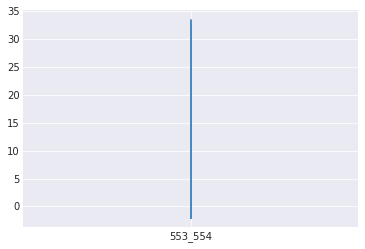

In [91]:
plt.plot(mean_error['links'], mean_error['MAE'], marker='', color=palette(1), linewidth=1.9, alpha=0.9, label=mean_error['MAE'])